In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
df = pd.read_csv("Bioactivity_data_preprocessed.csv")

In [ ]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt, desc_MolLogP,
                       desc_NumHDonors, desc_NumHAcceptors])
        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i += 1
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [7]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
254,436.512,1.47440,3.0,4.0
255,496.583,2.73690,3.0,4.0
256,471.985,2.06450,2.0,4.0
257,465.594,2.19130,2.0,4.0


In [8]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,52.0,active,436.512,1.47440,3.0,4.0
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,30.0,active,496.583,2.73690,3.0,4.0
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,14.0,active,471.985,2.06450,2.0,4.0
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,48.0,active,465.594,2.19130,2.0,4.0


In [ ]:
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i * 1e-9
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 1000000000:
            i = 1000000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
    return x

In [10]:
df_norm = norm_value(df_combined)
df_norm.standard_value_norm.describe()

count    2.590000e+02
mean     6.526248e+04
std      1.807599e+05
min      1.400000e+01
25%      3.550000e+03
50%      1.400000e+04
75%      4.500000e+04
max      2.000000e+06
Name: standard_value_norm, dtype: float64

In [13]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,436.512,1.47440,3.0,4.0,7.283997
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,active,496.583,2.73690,3.0,4.0,7.522879
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,471.985,2.06450,2.0,4.0,7.853872
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,465.594,2.19130,2.0,4.0,7.318759


In [16]:
df2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,436.512,1.47440,3.0,4.0,7.283997
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,active,496.583,2.73690,3.0,4.0,7.522879
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,471.985,2.06450,2.0,4.0,7.853872
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,465.594,2.19130,2.0,4.0,7.318759


**EDA**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

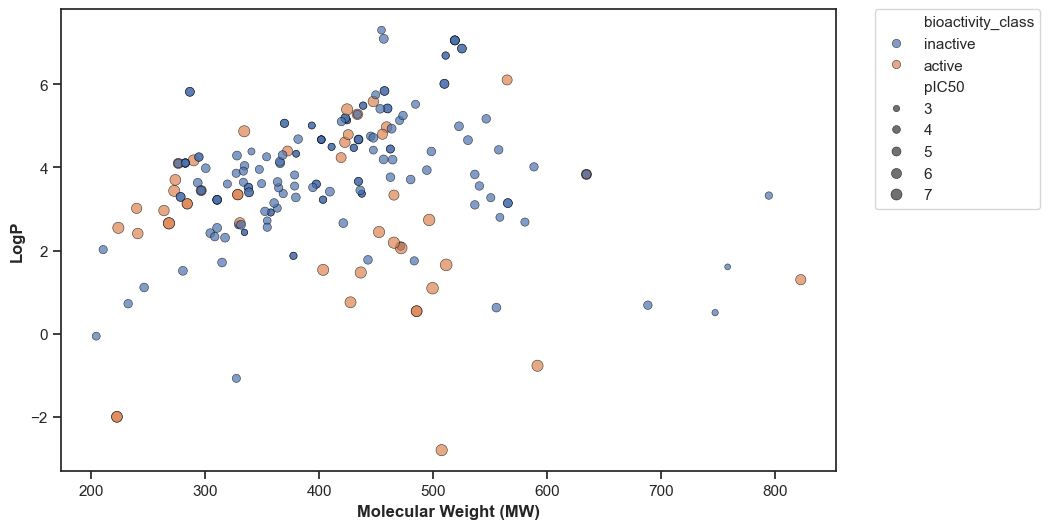

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MW', y='LogP', hue='bioactivity_class',
                data=df2class, size="pIC50", edgecolor="black", alpha=0.7)
plt.xlabel('Molecular Weight (MW)', fontweight='bold')
plt.ylabel('LogP', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

C:\Users\Ikrame TAGGAA\AppData\Local\Temp\ipykernel_76576\1669305283.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


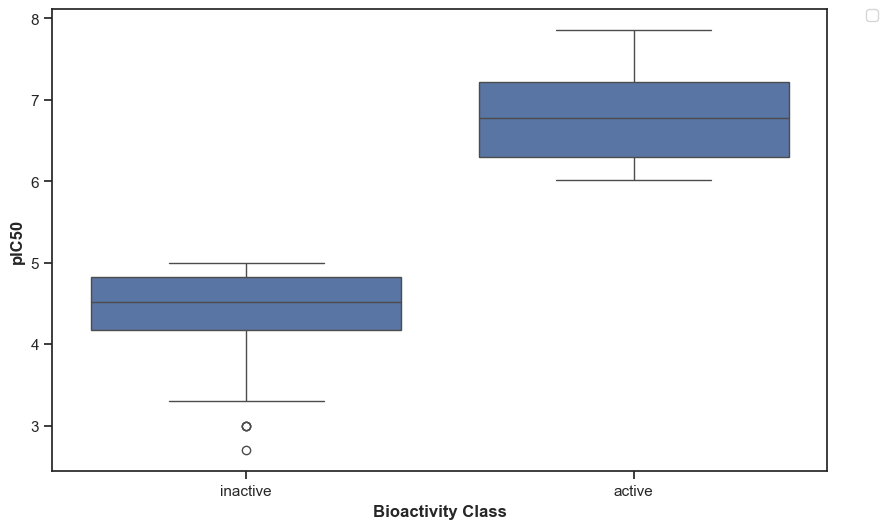

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bioactivity_class', y='pIC50', data=df2class)
plt.xlabel('Bioactivity Class', fontweight='bold')
plt.ylabel('pIC50', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_bioactivity_class_vs_pIC50.pdf')

Statistical Analysis : Mann-Whitney U Test

### Statistical Analysis: Mann-Whitney U Test

The Mann-Whitney U Test is a non-parametric statistical test used to determine whether there is a significant difference between the distributions of two independent groups. It is often used as an alternative to the t-test when the data does not necessarily follow a normal distribution.

**In our case:**
- We are comparing the pIC50 values between two groups: "active" and "inactive" compounds.

**Hypotheses:**
- **Null Hypothesis (H₀):** The distributions of pIC50 values for the active and inactive groups are equal (i.e., there is no significant difference between the two groups).
- **Alternative Hypothesis (H₁):** The distributions of pIC50 values for the active and inactive groups are different (i.e., there is a significant difference between the two groups).

**Interpretation:**
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference between the two groups.
- If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no statistically significant difference between the two groups.

In [22]:
from scipy.stats import mannwhitneyu

# Separate the pIC50 values for active and inactive groups
active = df2class[df2class['bioactivity_class'] == 'active']['pIC50']
inactive = df2class[df2class['bioactivity_class'] == 'inactive']['pIC50']

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(active, inactive, alternative='two-sided')

print('Mann-Whitney U statistic:', stat)
print('p-value:', p)

if p < 0.05:
    print('The difference between active and inactive groups is statistically significant (p < 0.05).')
else:
    print('The difference between active and inactive groups is not statistically significant (p >= 0.05).')

Mann-Whitney U statistic: 7380.0
p-value: 9.735837886045401e-25
The difference between active and inactive groups is statistically significant (p < 0.05).


In [23]:
# Mann-Whitney U Test for each descriptor
from scipy.stats import mannwhitneyu

descriptors = ['pIC50', 'MW', 'NumHDonors', 'NumHAcceptors']
for desc in descriptors:
    active = df2class[df2class['bioactivity_class'] == 'active'][desc]
    inactive = df2class[df2class['bioactivity_class'] == 'inactive'][desc]
    stat, p = mannwhitneyu(active, inactive, alternative='two-sided')
    print(f"Descriptor: {desc}")
    print('  Mann-Whitney U statistic:', stat)
    print('  p-value:', p)
    if p < 0.05:
        print('  The difference is statistically significant (p < 0.05).')
    else:
        print('  The difference is not statistically significant (p >= 0.05).')
    print('-'*50)

Descriptor: pIC50
  Mann-Whitney U statistic: 7380.0
  p-value: 9.735837886045401e-25
  The difference is statistically significant (p < 0.05).
--------------------------------------------------
Descriptor: MW
  Mann-Whitney U statistic: 3296.5
  p-value: 0.274129847245388
  The difference is not statistically significant (p >= 0.05).
--------------------------------------------------
Descriptor: NumHDonors
  Mann-Whitney U statistic: 3376.0
  p-value: 0.3651671170787524
  The difference is not statistically significant (p >= 0.05).
--------------------------------------------------
Descriptor: NumHAcceptors
  Mann-Whitney U statistic: 2685.5
  p-value: 0.00459479702103629
  The difference is statistically significant (p < 0.05).
--------------------------------------------------


In [25]:
# Create a table of descriptors and their p-values
import pandas as pd
from scipy.stats import mannwhitneyu

descriptors = ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
p_values = []

for desc in descriptors:
    active = df2class[df2class['bioactivity_class'] == 'active'][desc]
    inactive = df2class[df2class['bioactivity_class'] == 'inactive'][desc]
    stat, p = mannwhitneyu(active, inactive, alternative='two-sided')
    p_values.append(p)

results_df = pd.DataFrame({'Descriptor': descriptors, 'p-value': p_values})
display(results_df)

,Descriptor,p-value
0,pIC50,9.735838e-25
1,MW,2.741298e-01
2,LogP,3.138359e-04
3,NumHDonors,3.651671e-01
4,NumHAcceptors,4.594797e-03


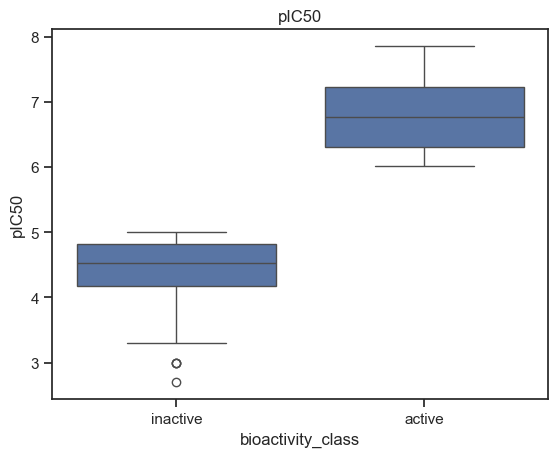

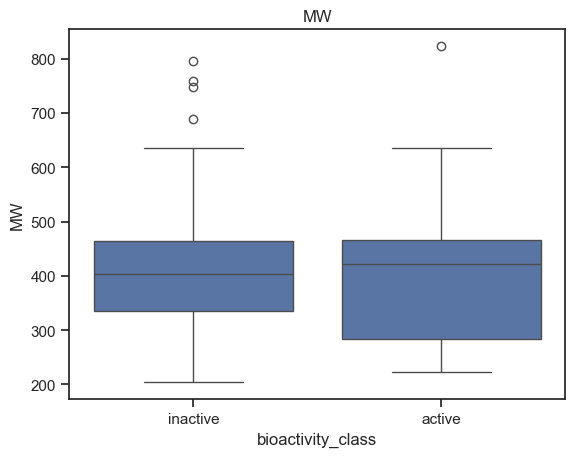

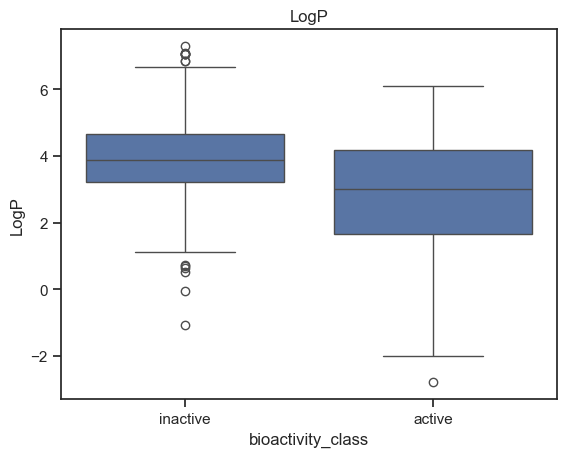

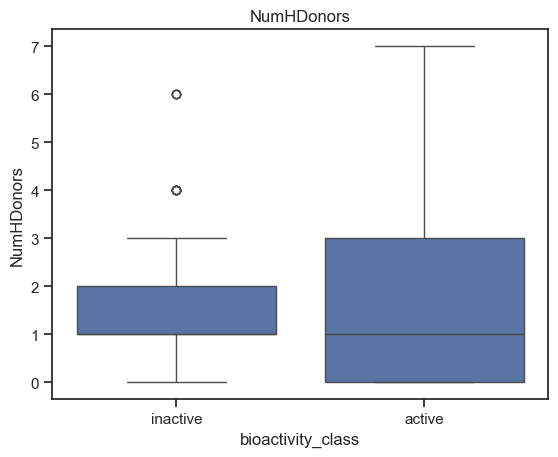

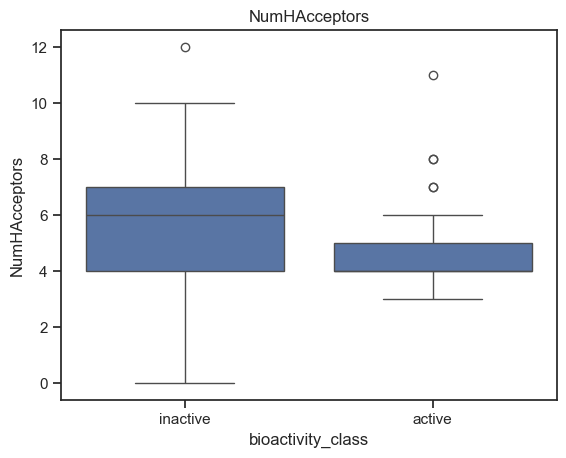

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='bioactivity_class', y=col, data=df2class)
    plt.title(col)
    plt.tight_layout()
    plt.savefig(f'boxplot_{col}.pdf')  # Save each plot as PDF
    plt.show()

# Save the statistical test results as CSV
results_df.to_csv('mannwhitneyu_results.csv', index=False)
print('Statistical test results saved as mannwhitneyu_results.csv')